In [3]:
import sys
sys.path.append('/Users/zhengj10/Python/Modules')
import PatcherBot as pb
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
# from skimage.io import imsave


In [4]:
imgPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw'
date = '2021.06.28_000'

platePath = pb.getPathInfo(os.path.join(imgPath,date))
for plate in platePath:
    cellPath = pb.getPathInfo(os.path.join(imgPath, date, plate))
    for cell in cellPath:
        imgFile = os.path.join(imgPath,date,plate,cell,'sIPSC&imaging_000/000','Camera','frames.ma')

        if not os.path.exists(imgFile):
            continue
        imgData = h5py.File(imgFile,'r')
        imgData = imgData['data'][()]
        daqFile = os.path.join(imgPath,date,plate,cell,'sIPSC&imaging_000/000','Camera','daqResult.ma')

        daqData = h5py.File(daqFile,'r')
        V_SYNC = daqData['data'][()][1]


        peak_indices = np.where(V_SYNC==1)
        peak_index = [k for k in range(peak_indices[0].shape[0]) if peak_indices[0][k]-peak_indices[0][k-1]!=1]
        peak_index = peak_indices[0][peak_index]
        
        
        print(plate,cell,imgData.shape,peak_index.shape)


plate_000 patch_attempt_0000_000 (3000, 508, 508) (3536,)
plate_000 patch_attempt_0005_000 (3000, 508, 508) (3001,)
plate_000 patch_attempt_0006_000 (3000, 508, 508) (3001,)
plate_000 patch_attempt_0007_000 (3000, 508, 508) (3535,)
plate_000 patch_attempt_0008_000 (3000, 508, 508) (3001,)
plate_000 patch_attempt_0009_000 (3000, 508, 508) (3001,)
plate_000 patch_attempt_0010_000 (3000, 508, 508) (3001,)
plate_000 patch_attempt_0011_000 (3000, 508, 508) (3001,)
plate_000 patch_attempt_0012_000 (3000, 508, 508) (3001,)
plate_000 patch_attempt_0013_000 (3000, 508, 508) (3001,)
plate_000 patch_attempt_0014_000 (3000, 508, 508) (3001,)
plate_000 patch_attempt_0015_000 (3000, 508, 508) (3001,)
plate_000 patch_attempt_0017_000 (3000, 508, 508) (3001,)
plate_000 patch_attempt_0018_000 (3000, 508, 508) (3001,)
plate_000 patch_attempt_0019_000 (3000, 508, 508) (3001,)
plate_000 patch_attempt_0020_000 (3000, 508, 508) (3001,)
plate_000 patch_attempt_0022_000 (3000, 508, 508) (3535,)
plate_000 patc

(1800, 508, 41)
(1851,)
(1800, 508, 41)
(1851,)
(1800, 508, 41)
(1852,)
(1800, 508, 41)
(1851,)
(1800, 508, 41)
(1854,)
(1800, 508, 41)
(1852,)
(1800, 508, 41)
(1852,)


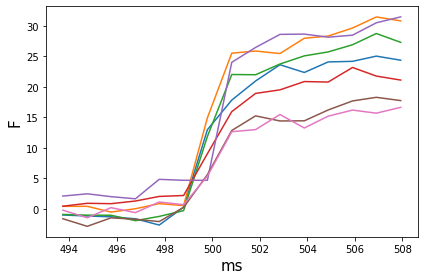

In [33]:
date = '2021.06.29_000'
plate = 'plate_003'
# cell = 'patch_attempt_0013_000'

cellPath = pb.getPathInfo(os.path.join(imgPath, date, plate))

for cell in cellPath:
    imgFile = os.path.join(imgPath,date,plate,cell,'camera_clamp1_000/000','Camera','frames.ma')
    if not os.path.exists(imgFile):
        continue
    imgData = h5py.File(imgFile,'r')
    imgData = imgData['data'][()]
    print(imgData.shape)
    F_all = []
    for frame in range(imgData.shape[0]):
        F = np.mean(imgData[frame,240:272,:])
        F_all.append(F)
    F_all = np.array(F_all)-F_all[0]

    daqFile = os.path.join(imgPath,date,plate,cell,'camera_clamp1_000','000','Camera','daqResult.ma')
    daqData = h5py.File(daqFile,'r')
    V_SYNC = daqData['data'][()][1]

    peak_indices = np.where(V_SYNC==1)
    peak_index = [k for k in range(peak_indices[0].shape[0]) if peak_indices[0][k]-peak_indices[0][k-1]!=1]
    peak_index = peak_indices[0][peak_index]
    print(peak_index.shape)
    peak_index_ms = peak_index/40.0
    plt.plot(peak_index_ms[:1800][485:500],F_all[485:500])
plt.xlabel('ms',size=15)
plt.ylabel('F',size=15)
plt.tight_layout()
plt.savefig('/Users/zhengj10/Desktop/frame_drop_with_Voltron/Positron 2.png')


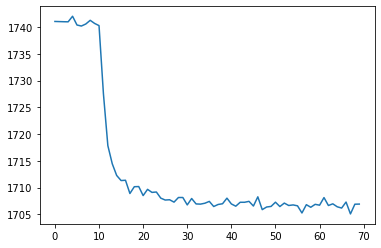

In [7]:
plt.plot(F_all[480:550])

1799


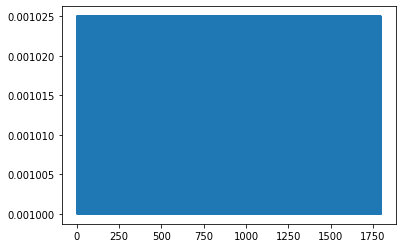

In [34]:
timingData = h5py.File(imgFile,'r')
timing_info = timingData['info']['0']['values'][()]
intervals = []
for i in range(timing_info.shape[0]-1):
    interval = timing_info[i+1]-timing_info[i]
    intervals.append(interval)
print(len(intervals))
plt.plot(intervals)

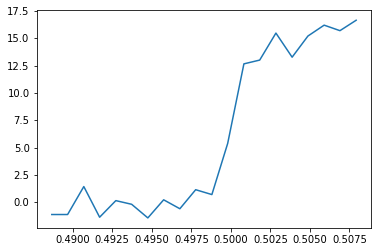

In [36]:
plt.plot(timing_info[480:500],F_all[480:500])

In [7]:
imgData_mean = np.mean(imgData,axis=0)

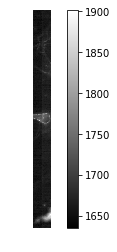

In [8]:
plt.imshow(imgData_mean,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()


In [10]:
idx_all_trials = []
timing_all_trials = []
frame_offset_all_trials = []

daqFile = os.path.join(imgPath,date,plate,cell,'camera_clamp1_000','000','Camera','daqResult.ma')

daqData = h5py.File(daqFile,'r')
V_SYNC = daqData['data'][()][1]


peak_indices = np.where(V_SYNC==1)
peak_index = [k for k in range(peak_indices[0].shape[0]) if peak_indices[0][k]-peak_indices[0][k-1]!=1]
peak_index = peak_indices[0][peak_index]
peak_index_ms = peak_index/40.0 # change to ms
#             print(peak_index.shape)
for i in range(peak_index.shape[0]):
    if peak_index_ms[i]>=500.0:
#                     print(i,peak_index[i])
        idx = i
        break

stim_timing = peak_index[idx]
idx_all_trials.append(idx)
timing_all_trials.append(stim_timing)

# imgData = h5py.File(imgData,'r')
# imgData = imgData['data'][()]

F_all = []
for frame in range(imgData.shape[0]):
    F = np.mean(imgData[frame,240:272,:])
    F_all.append(F)


In [11]:
# fig = plt.figure(figsize=[15,3])
# plt.plot(V_SYNC)
# plt.scatter(peak_index,np.ones(peak_index.shape),color='m')
# i = 0
# # plt.xlim([i,i+100])
# plt.xlim([592500,595000])
# # i=i+20000


In [12]:
peak_index.shape

(1852L,)

1851


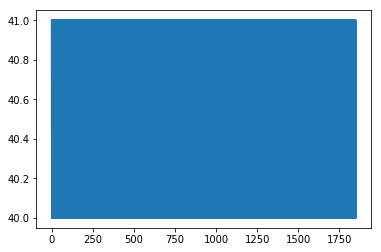

In [13]:
intervals = []
for i in range(peak_index.shape[0]-1):
    interval = peak_index[i+1]-peak_index[i]
    intervals.append(interval)
print(len(intervals))
plt.plot(intervals)


In [296]:
np.unique(np.diff(peak_index))

array([396, 397], dtype=int64)